In [1574]:
import numpy as np
import os
from nd2reader import ND2Reader
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib_scalebar.scalebar import ScaleBar
import scipy.ndimage as ndi
from skimage.filters import rank 
from scipy.signal import butter, lfilter
import scipy.misc as misc
from skimage import exposure
from PIL import Image
import colorcet as cc
from scipy.misc import toimage
import matplotlib.colors as clr
import pandas as pd
import seaborn as sns
from scipy import stats
import cv2
from pyspark import SparkContext, SparkConf
import skimage
from pathlib import Path

def mean2(x):
    y = np.sum(x) / np.size(x);
    return y
def corr2(a,b):
    a = a - mean2(a)
    b = b - mean2(b)

    r = (a*b).sum() / np.sqrt((a*a).sum() * (b*b).sum());
    return r
from copy import deepcopy
from skimage.filters import threshold_otsu,threshold_li
import glob
from IPython.display import clear_output
import scipy.io as spio
import pims
import fnmatch
from skimage import io
import os.path, time

In [1575]:
expdir='/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/' #master folder
protein="int" #TNR,Agg,WFA,HABP

In [1576]:
results = {"calcium recording filename":[], "corresponding syt/clumps filename":[],
           "clumpschannelno":[],"synapsechannelno":[],
           "spontaneous or stimulation":[],
           "magnification":[],
           "Manual mask from matlab GUI":[],
           
           "calcium mean intensity whole frame":[],
           "calcium mean intensity in rois":[],
           "calcium mean intensity in rois - vector for each roi":[],
           "calcium [f(t)-f(0)]/f(0) in rois":[],
           "calcium [f(t)-f(0)]/f(0) in rois - vector for each roi":[],
           "total calcium influx (AOC of [f(t)-f(0)]/f(0) in rois)":[],
           "calcium slope downwards":[],
           
           #"synapse mask (dilated syt1)":[],
           #"df/f under dilated syt mask":[],
           
           "synchronicity (pearson)":[],
           "synchronicity (no. of peaks)":[]}

path = os.path.dirname(expdir)  
filelist = []
for root, _, filenames in os.walk(path):
     for filename in filenames:
         filelist.append(os.path.join(root, filename))      
for i in range(0,len(filelist)):
    
    if ("ignore for analysis" in str(filelist[i]))==False:
        #if ("20191029" in str(filelist[i]))==False:
            if ("syt" in str(filelist[i]))==False:

                if filelist[i].endswith(".tif"): 
                    print(filelist[i])
                    results["calcium recording filename"].append(filelist[i])


                    channeldir="/".join(filelist[i].split("/")[:-2])
                    exec(open(channeldir+"/channels.txt").read())
                    results["clumpschannelno"].append(clumpschannelno)
                    results["synapsechannelno"].append(synapsechannelno)
                    
                    if ('spontaneous' in str(filelist[i]))==True:
                        results["spontaneous or stimulation"].append('spontaneous')
                        print('spont')

                    else:
                        results["spontaneous or stimulation"].append('stim')
                        print('stim')
                    if "60x" in str(filelist[i]):
                        results["magnification"].append('60x')
                    else:
                        results["magnification"].append('20x')

                    #add syt image if exists
                    a=filelist[i]
                    no=a.split('field')[-1][0]

                    filelist_syt = []
                    syt_image=[]
                    for root, _, filenames in os.walk(path):
                         for filename in filenames:
                             filelist_syt.append(os.path.join(root, filename))      
                    for ij in range(0,len(filelist_syt)):
                        if ("syt" in str(filelist_syt[ij])):
                            if (a.split('field')[0]+'field'+str(no)) in str(filelist_syt[ij]):
                                syt_image.append(filelist_syt[ij])
                    if len(syt_image)>0:
                        results["corresponding syt/clumps filename"].append(syt_image[:])
                        print(syt_image[:])
                    else:
                        results["corresponding syt/clumps filename"].append('no image')

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191016_Clumps1/spontaneous/20x_spontaneous_activity_field3.tif
spont
['/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191016_Clumps1/spontaneous/20x_spontaneous_activity_field3_syt_clumps.tif']
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191016_Clumps1/spontaneous/20x_spontaneous_activity_field2.tif
spont
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191016_Clumps1/60x_post_ttx_stim/60x_field1_stim.tif
stim
['/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191016_Clumps1/60x_post_ttx_stim/60x_field1_syt_clumps.tif', '/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191016_Clumps1/60x_post_ttx_stim/60x_field1_syt_clumps_dendritesmask

['/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191020_Ctrl1_20x/post ttx stim/20191020_ctrl_postttxstim_field1_syt.tif']
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191020_Ctrl1_20x/post ttx stim/20191020_ctrl_postttxstim_field2.tif
stim
['/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191020_Ctrl1_20x/post ttx stim/20191020_ctrl_postttxstim_field2_syt.tif']
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191020_Ctrl1_20x/post ttx stim/20191020_ctrl_postttxstim_field3.tif
stim
['/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191020_Ctrl1_20x/post ttx stim/20191020_ctrl_postttxstim_field3_syt.tif']
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191020_Ctrl1_20x/post ttx stim/2

['/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191029_Clump2/post ttx/Ctrl1_stim_field4_syt.nd2', '/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191029_Clump2/post ttx/Ctrl1_stim_field4_syt.tif']
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191029_Clump2/post ttx/Ctrl1_stim_field5.tif
stim
['/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191029_Clump2/post ttx/Ctrl1_stim_field5_syt.nd2', '/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191029_Clump2/post ttx/Ctrl1_stim_field5_syt.tif']
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191029_Clump2/spontaneous/Ctrl1_spont_field1.tif
spont
['/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calcium

['/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191029_Ctrl3/post ttx/Ctrl1_stimt_field3_syt.nd2', '/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191029_Ctrl3/post ttx/Ctrl1_stimt_field3_syt.tif']
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191029_Ctrl3/post ttx/Ctrl1_stimt_field4.tif
stim
['/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191029_Ctrl3/post ttx/Ctrl1_stimt_field4_syt.nd2', '/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191029_Ctrl3/post ttx/Ctrl1_stimt_field4_syt.tif']
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191029_Ctrl3/post ttx/Ctrl1_stimt_field5.tif
stim
['/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimagi

## load matlab 

In [1577]:
for im in range(0,len(results["calcium recording filename"])): 
    file=results["calcium recording filename"][im][:-4]+'_dendritesmask.mat'
    from pathlib import Path
    my_file = Path(file)
    if my_file.exists():
        #print(file)
        mat = spio.loadmat(file, squeeze_me=True)
        mask=mat['totMask']>0.99
        if np.sum(mask)==0:
            print(file)
        results["Manual mask from matlab GUI"].append(mask)
    else:
        results["Manual mask from matlab GUI"].append(np.nan)
#clear_output()        
print("Done!")

Done!


## loop over images

In [1619]:
from scipy.stats import linregress
counter=0
for im in range(0,len(results["calcium recording filename"])):
    flagstim=False
    


    image_name=results["calcium recording filename"][im]
    image = io.imread(image_name)
    matlab_mask=results["Manual mask from matlab GUI"][im]
    
    #segment
    image[0][~matlab_mask]=0
    labeled,cc_num=ndi.label(image[0])
    counter=counter+cc_num
    
    #background 
    bg=np.mean(ndi.median_filter(image[0],size=5))+0*np.std(ndi.median_filter(image[0],size=5))
    #image=image-bg
    #image[image<0]=0
    
    mean_int_all_spot_vector=[]
    df_over_f_all_spot_vector=[]
    
    if results["spontaneous or stimulation"][im]=="stim":
        flagstim=True
        
    if cc_num==1:
        mean_int_spot=image[:,labeled==0].mean(axis=1)
        if flagstim:
            f0=mean_int_spot[0]
        else:
            f0=mean_int_spot[mean_int_spot>0].min()
        if f0==0:
            if flagstim:
                f0=mean_int_spot[mean_int_spot>0].min()
            else:
                f0=mean_int_spot[mean_int_spot>0].min()
        
        mean_int_all_spot_vector=mean_int_spot[1:-1]
        df_over_f_all_spot_vector= (np.subtract(mean_int_spot,f0)/f0)[1:-1]
    
    else:
        for spot in range(0,cc_num):
            mean_int_spot=image[:,labeled==spot].mean(axis=1)
            if np.isnan(mean_int_spot).any():
                #print('nan')
                continue
            elif np.isinf(mean_int_spot).any():
                #print('inf')
                continue
            if flagstim:
                f0=mean_int_spot[0]
            else:
                f0=mean_int_spot[mean_int_spot>0].min()
            if f0==0:
                if flagstim:
                    f0=mean_int_spot[mean_int_spot>0].min()
                else:
                    f0=mean_int_spot[mean_int_spot>0].min()
            df_over_f_spot=(np.subtract(mean_int_spot,f0))/f0
            df_over_f_spot
            if np.isnan(df_over_f_spot).any():
                #print('nan')
                continue
            elif np.isinf(df_over_f_spot).any():
                #print('inf')
                continue
            else:
                #print('cool')

                mean_int_all_spot_vector.append(mean_int_spot[1:-1])
                df_over_f_all_spot_vector.append(df_over_f_spot[1:-1])
        
            if mean_int_spot[0]==0:
                print(image_name)
        
    mean_int_all_spot_vector=np.array(mean_int_all_spot_vector)
    
    df_over_f_all_spot_vector=np.array(df_over_f_all_spot_vector)
    
    '''#drop nans
    mask = np.all(np.isnan(mean_int_all_spot_vector) | np.equal(mean_int_all_spot_vector, 0), axis=1)
    mean_int_all_spot_vector=mean_int_all_spot_vector[~mask]
    
    mask = np.all(np.isnan(df_over_f_all_spot_vector) | np.equal(df_over_f_all_spot_vector, 0), axis=1)
    df_over_f_all_spot_vector=df_over_f_all_spot_vector[~mask]
    mask = np.all(np.isinf(df_over_f_all_spot_vector) | np.equal(df_over_f_all_spot_vector, 0), axis=1)
    df_over_f_all_spot_vector=df_over_f_all_spot_vector[~mask]'''
    
    if np.any(np.isnan(mean_int_all_spot_vector)):
        #print(image_name)
        print(np.sum(matlab_mask))
        print(mean_int_spot)
        print(mean_int_all_spot_vector)
        results["calcium mean intensity whole frame"].append(np.nan)
        results["calcium mean intensity in rois"].append(np.nan)
        results["calcium mean intensity in rois - vector for each roi"].append(np.nan)
        results["calcium [f(t)-f(0)]/f(0) in rois"].append(np.nan)
        results["calcium [f(t)-f(0)]/f(0) in rois - vector for each roi"].append(np.nan)
        results["total calcium influx (AOC of [f(t)-f(0)]/f(0) in rois)"].append(np.nan)
        results["calcium slope downwards"].append(np.nan)
        results["synchronicity (pearson)"].append(np.nan)
        results["synchronicity (no. of peaks)"].append(np.nan)
        break
        
    if cc_num==1:
        df_over_f_all_spots_in_image=df_over_f_all_spot_vector
        mean_int_all_spots_in_image=mean_int_all_spot_vector
    else:
        mean_int_all_spots_in_image=np.nanmean(mean_int_all_spot_vector,axis=0)
        df_over_f_all_spots_in_image=np.nanmean(df_over_f_all_spot_vector,axis=0)
    
    aoc_all_spots_in_image= np.trapz(df_over_f_all_spots_in_image,axis=0)
    pearson_all_spots_in_image=np.mean(np.corrcoef(df_over_f_all_spot_vector))
    
    #no_peaks
    if flagstim:
        threshold=1
    else:
        threshold=10
        
    stack=df_over_f_all_spots_in_image
    prev = stack[0] or 0.01
    peaks = []
    no_peaks_in_image=0
    for i in range(0,100):
        if no_peaks_in_image==int(0):
            for num, i in enumerate(stack[1:], 1):
                if (i - prev) / prev > threshold:
                    peaks.append(num)
                prev = i or 0.001
            threshold=threshold-0.1
            no_peaks_in_image=int(len(peaks))
            print(threshold)
            print(len(peaks))
        else:
            break
    
    #calculate slope
    if flagstim:
        if no_peaks_in_image==0:
            peaks=1
        else:
            peaks=peaks[0]
        X=np.arange(peaks,peaks+10)
        Y=df_over_f_all_spots_in_image[peaks:peaks+10]
        slope,_,_,_,_=linregress(X, Y)
    else:
        slope=np.nan

    #mean intensity full image
    mean_int_full=image.mean(axis=1).mean(axis=1)
    
    results["calcium mean intensity whole frame"].append(mean_int_full)
    results["calcium mean intensity in rois"].append(mean_int_all_spots_in_image)
    results["calcium mean intensity in rois - vector for each roi"].append(mean_int_all_spot_vector)
    results["calcium [f(t)-f(0)]/f(0) in rois"].append(df_over_f_all_spots_in_image)
    results["calcium [f(t)-f(0)]/f(0) in rois - vector for each roi"].append(df_over_f_all_spot_vector)
    results["total calcium influx (AOC of [f(t)-f(0)]/f(0) in rois)"].append(aoc_all_spots_in_image)
    results["calcium slope downwards"].append(slope)
    results["synchronicity (pearson)"].append(pearson_all_spots_in_image)
    results["synchronicity (no. of peaks)"].append(no_peaks_in_image)

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191016_Clumps1/spontaneous/20x_spontaneous_activity_field3.tif
9.9
2
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191016_Clumps1/spontaneous/20x_spontaneous_activity_field2.tif
9.9
0
9.8
0
9.700000000000001
0
9.600000000000001
0
9.500000000000002
0
9.400000000000002
0
9.300000000000002
0
9.200000000000003
0
9.100000000000003
0
9.000000000000004
0
8.900000000000004
0
8.800000000000004
0
8.700000000000005
0
8.600000000000005
0
8.500000000000005
0
8.400000000000006
0
8.300000000000006
0
8.200000000000006
0
8.100000000000007
0
8.000000000000007
0
7.9000000000000075
0
7.800000000000008
0
7.700000000000008
0
7.6000000000000085
0
7.500000000000009
0
7.400000000000009
0
7.30000000000001
0
7.20000000000001
0
7.10000000000001
0
7.000000000000011
0
6.900000000000011
0
6.800000000000011
0
6.700000000000012
0
6.600000000000012
0
6.500000000000012
0

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191020_Ctrl1_20x/post ttx stim/20191020_ctrl_postttxstim_field1.tif
0.9
9
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191020_Ctrl1_20x/post ttx stim/20191020_ctrl_postttxstim_field2.tif
0.9
1
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191020_Ctrl1_20x/post ttx stim/20191020_ctrl_postttxstim_field3.tif
0.9
4
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191020_Ctrl1_20x/post ttx stim/20191020_ctrl_postttxstim_field4.tif
0.9
7
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191020_Ctrl1_20x/post ttx stim/20191020_ctrl_postttxstim_field5.tif
0.9
7
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191020_Ctrl2_20x/spontaneous/2019102

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191029_Ctrl1/post ttx/Ctrl1_stim_field1.tif
0.9
4
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191029_Ctrl1/post ttx/Ctrl1_stim_field2.tif
0.9
2
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191029_Ctrl1/post ttx/Ctrl1_stim_field3.tif
0.9
1
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191029_Ctrl1/post ttx/Ctrl1_stim_field41.tif
0.9
9
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191029_Ctrl1/post ttx/Ctrl1_stim_field5.tif
0.9
3
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191029_Ctrl1/spontaneous/Ctrl1_spont_field1.tif
9.9
0
9.8
0
9.700000000000001
0
9.600000000000001
0
9.500000000000002
0
9.400000000000002
0
9.3000000000000

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191029_Ctrl4/post ttx/Ctrl1_stim_field1.tif
0.9
5
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191029_Ctrl4/post ttx/Ctrl1_stim_field2.tif
0.9
4
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191029_Ctrl4/post ttx/Ctrl1_stim_field3.tif
0.9
7
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191029_Ctrl4/post ttx/Ctrl1_stim_field4.tif
0.9
4
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191029_Ctrl4/post ttx/Ctrl1_stim_field5.tif
0.9
2
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191029_Ctrl4/spontaneous/Ctrl1_spont_field1.tif
9.9
0
9.8
0
9.700000000000001
0
9.600000000000001
0
9.500000000000002
0
9.400000000000002
0
9.30000000000000

In [1620]:
counter

620

In [339]:
for im in range(0,5):#len(results["calcium recording filename"])):

    image_name=results["calcium recording filename"][im]
    syt_image_name=results["corresponding syt/clumps filename"][im][0]
    print(syt_image_name)
    if syt_image_name=='n':
        results["synapse mask (dilated syt1)"].append(np.nan)
        results["df/f under dilated syt mask"].append(np.nan)
        continue
    image = io.imread(image_name)
    syt_image = io.imread(syt_image_name)[0]
    
    #mask from syt
    syt_image_threshold=threshold_li(syt_image)
    syt_image_thresholded=deepcopy(syt_image)
    syt_image_thresholded[syt_image_thresholded<syt_image_threshold]=0

    syt_mask=deepcopy(syt_image_thresholded)
    syt_mask[syt_mask>np.percentile(syt_mask,85)]=0

    syt_mask=ndi.gaussian_filter(syt_mask,sigma=.1)
    syt_mask[syt_mask>0]=1
    syt_mask=ndi.binary_dilation(syt_mask,iterations=1)
    syt_mask=ndi.binary_fill_holes(syt_mask)
    
    
    #background 
    bg=np.mean(ndi.median_filter(image[0],size=5))+0*np.std(ndi.median_filter(image[0],size=5))
    mean_int_under_syt=[]
    
            
    df_over_f_all_spot_vector=[]
        
    first=image[0]
    first=np.subtract(first,bg)
    first[first<0]=0
    f0=first[syt_mask].mean()
    df_over_f_all_spot_vector.append(0.)
        
    for frame in range(1,len(image)):
        #bg subtract
        frameim=image[frame]
        frameim=np.subtract(frameim,bg)
        frameim[frameim<0]=0
        
        df_over_f_spoti=(frameim[syt_mask].mean()-f0)/f0
        if df_over_f_spoti<0:
            df_over_f_spoti=0

        df_over_f_all_spot_vector.append(df_over_f_spoti)
        
    df_over_f_all_spots_in_image=np.nanmean(df_over_f_all_spot_vector,axis=0)
    
    
    results["synapse mask (dilated syt1)"].append(syt_mask)
    results["df/f under dilated syt mask"].append(df_over_f_all_spots_in_image)
    

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191016_Clumps1/spontaneous/20x_spontaneous_activity_field3_syt_clumps.tif
n
n
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191016_Clumps1/60x_post_ttx_stim/60x_field1_syt_clumps.tif
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191016_Clumps1/60x_post_ttx_stim/60x_field2_syt_clumps.tif


In [1539]:
len()

(41, 512, 512)

## sanity check

stim


KeyError: 'synapse mask (dilated syt1)'

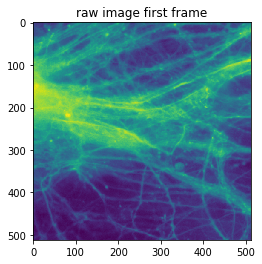

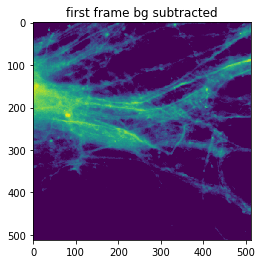

<Figure size 432x288 with 0 Axes>

In [1525]:
randomno=np.random.randint(0,5)
image_name=results["calcium recording filename"][randomno]
image = io.imread(image_name)
print(results["spontaneous or stimulation"][randomno])
plt.figure()
plt.imshow(image[0])
plt.title('raw image first frame')
bg=np.mean(ndi.median_filter(image[0],size=5))+0*np.std(ndi.median_filter(image[0],size=5))
first=image[0]
first=np.subtract(first,bg)
first[first<0]=0
plt.figure()
plt.imshow(first)
plt.title('first frame bg subtracted')
plt.figure()
plt.imshow(results["synapse mask (dilated syt1)"][randomno])
plt.title('synapse mask')

pearson_all_spots_in_image=results["synchronicity (pearson)"][randomno]
aoc_all_spots_in_image=results["total calcium influx (AOC of [f(t)-f(0)]/f(0) in rois)"][randomno]
no_peaks_in_image=results["synchronicity (no. of peaks)"][randomno]
slope=results["calcium slope downwards"][randomno]

plt.figure()
plt.plot(results["calcium [f(t)-f(0)]/f(0) in rois"][randomno])
plt.title('df/f under rois')
plt.figure()
plt.plot(results["df/f under dilated syt mask"][randomno])
plt.title('df/f under syt')

print('pearson  '+str(pearson_all_spots_in_image))
print('aoc  '+str(aoc_all_spots_in_image))
print('no peaks '+str(no_peaks_in_image))
print('slope. '+str(slope))

In [1586]:
df=pd.DataFrame(results)

In [1603]:
for key in results.keys():
    print(key)
    print(len(results[key]))

calcium recording filename
76
corresponding syt/clumps filename
76
clumpschannelno
76
synapsechannelno
76
spontaneous or stimulation
76
magnification
76
Manual mask from matlab GUI
76
calcium mean intensity whole frame
76
calcium mean intensity in rois
76
calcium mean intensity in rois - vector for each roi
76
calcium [f(t)-f(0)]/f(0) in rois
76
calcium [f(t)-f(0)]/f(0) in rois - vector for each roi
76
total calcium influx (AOC of [f(t)-f(0)]/f(0) in rois)
76
calcium slope downwards
76
synchronicity (pearson)
76
synchronicity (no. of peaks)
76


In [1610]:
df

,calcium recording filename,corresponding syt/clumps filename,clumpschannelno,synapsechannelno,spontaneous or stimulation,magnification,Manual mask from matlab GUI,calcium mean intensity whole frame,calcium mean intensity in rois,calcium mean intensity in rois - vector for each roi,calcium [f(t)-f(0)]/f(0) in rois,calcium [f(t)-f(0)]/f(0) in rois - vector for each roi,total calcium influx (AOC of [f(t)-f(0)]/f(0) in rois),calcium slope downwards,synchronicity (pearson),synchronicity (no. of peaks),condition
0,/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/L...,[/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/...,1,2,spontaneous,20x,"[[False, False, False, False, False, False, Fa...","[121.3855094909668, 933.0998878479004, 880.432...","[3337.8714766033795, 3153.644579282348, 2366.6...","[[830.0737190527663, 782.0366279046748, 645.22...","[0.8453004842711623, 0.7425994866990758, 0.310...","[[0.43539867456449016, 0.35233089952086066, 0....",20.633210,NaN,0.960793,2,Clumps
1,/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/L...,no image,1,2,Ignore,20x,"[[False, False, False, False, False, False, Fa...","[62.67174530029297, 1396.8681297302246, 1396.6...","[2277.7471896988422, 2281.2972271433828, 2290....","[[1365.7372598781822, 1365.5258472590972, 1364...","[0.01010580082362621, 0.01275850417962163, 0.0...","[[0.0017898449710713382, 0.0016347704767890716...",1.950477,NaN,0.755590,1,Clumps
2,/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/L...,[/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/...,1,2,stim,60x,"[[False, False, False, False, False, False, Fa...","[141.28565979003906, 1805.425682067871, 1803.9...","[1698.9664063169207, 1697.672718565299, 1696.9...","[1698.9664063169207, 1697.672718565299, 1696.9...","[0.004657411160297326, 0.0038924089904123706, ...","[0.004657411160297326, 0.0038924089904123706, ...",0.193119,-0.001296,1.000000,2,Clumps
3,/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/L...,[/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/...,1,2,stim,60x,"[[False, False, False, False, False, False, Fa...","[355.48902130126953, 3930.639171600342, 3925.1...","[3713.6315779047377, 3708.815743389409, 3706.9...","[3713.6315779047377, 3708.815743389409, 3706.9...","[0.05552064798907731, 0.054151849641262746, 0....","[0.05552064798907731, 0.054151849641262746, 0....",1.278209,-0.000483,1.000000,1,Clumps
4,/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/L...,[/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/...,1,2,stim,60x,"[[False, False, False, False, False, False, Fa...","[296.056941986084, 4749.915718078613, 4748.142...","[4618.416412544348, 4616.560864767374, 4617.89...","[4618.416412544348, 4616.560864767374, 4617.89...","[0.019436944688776162, 0.019027364047380608, 0...","[0.019436944688776162, 0.019027364047380608, 0...",0.743532,0.000498,1.000000,1,Clumps
5,/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/L...,[/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/...,1,2,stim,60x,"[[False, False, False, False, False, False, Fa...","[387.914306640625, 6283.646514892578, 6298.044...","[9673.16087465307, 9691.759833632274, 9707.726...","[[6107.6943677057025, 6121.815257901456, 6135....","[0.0006360633684460975, 0.0026647433306352425,...","[[0.0, 0.0023119837610764073, 0.00461044987385...",0.917426,0.002465,0.981510,1,Clumps
6,/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/L...,[/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/...,1,2,stim,60x,"[[False, False, False, False, False, False, Fa...","[118.40682220458984, 3833.4723167419434, 3838....","[5259.4142584951005, 5269.2324917975075, 5283....","[[3776.8749631548735, 3782.2200856358304, 3785...","[0.0015055401185702496, 0.0032762248256060712,...","[[0.0, 0.0014152235732188595, 0.00226552118328...",1.238802,0.003928,0.914318,2,Clumps
7,/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/L...,[/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/...,1,2,stim,60x,"[[False, False, False, False, False, False, Fa...","[95.8699951171875, 2705.5671577453613, 2704.37...","[3312.005529569904, 3309.4440936458745, 3306.1...","[[2687.830820

In [1589]:
df["condition"]='None'
for i in range(0,len(df)):
    if "Clump" in df["calcium recording filename"][i].split('/')[-3]:
        df["condition"][i]="Clumps"
    elif "Ctrl" in df["calcium recording filename"][i].split('/')[-3]:
        df["condition"][i]="Ctrl"
        

/Users/taldankovich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/taldankovich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [1622]:
len(df[df["spontaneous or stimulation"]=="Ignore"])

2

In [1590]:
for i in range(0,len(df["spontaneous or stimulation"])):
    if df["spontaneous or stimulation"][i]=="spontaneous":
        print('yes')
        if len(df["calcium [f(t)-f(0)]/f(0) in rois"][i])<100:
            print(len(df["calcium [f(t)-f(0)]/f(0) in rois"][i]))
            df["spontaneous or stimulation"][i]="Ignore"
        else:
            print('bigger')
            continue

yes
bigger
yes
39
yes
bigger
yes
bigger
yes
39
yes
bigger
yes
bigger
yes
bigger
yes
bigger
yes
bigger
yes
bigger
yes
bigger
yes
bigger
yes
bigger
yes
bigger
yes
bigger
yes
bigger


/Users/taldankovich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [1591]:
dfclumps=df[df["condition"]=="Clumps"]
dfctrl=df[df["condition"]=="Ctrl"]

In [1519]:
df.columns

Index(['calcium recording filename', 'corresponding syt/clumps filename',
       'clumpschannelno', 'synapsechannelno', 'spontaneous or stimulation',
       'magnification', 'Manual mask from matlab GUI',
       'calcium mean intensity whole frame', 'calcium mean intensity in rois',
       'calcium mean intensity in rois - vector for each roi',
       'calcium [f(t)-f(0)]/f(0) in rois',
       'calcium [f(t)-f(0)]/f(0) in rois - vector for each roi',
       'total calcium influx (AOC of [f(t)-f(0)]/f(0) in rois)',
       'calcium slope downwards', 'synchronicity (pearson)',
       'synchronicity (no. of peaks)', 'condition'],
      dtype='object')

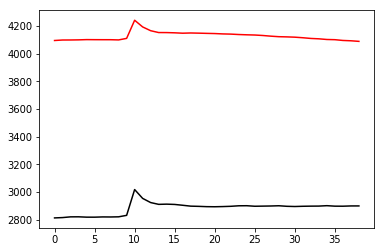

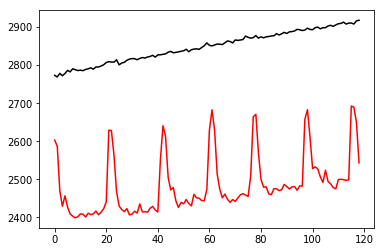

In [1593]:
#var="calcium [f(t)-f(0)]/f(0) in rois"
#var="calcium mean intensity whole frame"
#var="calcium mean intensity in rois"
plt.figure()
plt.plot(np.mean(dfclumps[dfclumps["spontaneous or stimulation"]=="stim"][var].values,axis=0),color='red')
plt.plot(np.mean(dfctrl[dfctrl["spontaneous or stimulation"]=="stim"][var].values,axis=0),color='black')
#plt.ylim([0,0.08])
plt.figure()
plt.plot(np.mean(dfclumps[dfclumps["spontaneous or stimulation"]=="spontaneous"][var].values,axis=0),color='red')
plt.plot(np.mean(dfctrl[dfctrl["spontaneous or stimulation"]=="spontaneous"][var].values,axis=0),color='black')
#plt.ylim([0,0.25])


In [1630]:
var="calcium mean intensity in rois - vector for each roi"

In [1631]:
dfctrl_sp=df[df["spontaneous or stimulation"]=="stim"]
len(dfctrl_sp)

59

In [1635]:
dfctrl_sp=dfclumps[dfclumps["spontaneous or stimulation"]=="spontaneous"]
a=dfctrl_sp[var].dropna().values.ravel()
list=[]
for i in range(0,len(a)):
    b=a[i].tolist()
    list.append(b)
y = np.vstack(list)
print('clumps spontaneous: '+str(y.shape[0]))
np.savetxt(expdir+'clumps_spontaneous.csv',y)

dfctrl_sp=dfclumps[dfclumps["spontaneous or stimulation"]=="stim"]
a=dfctrl_sp[var].dropna().values.ravel()
list=[]
for i in range(0,len(a)):
    b=a[i].tolist()
    list.append(b)
y = np.vstack(list)
print('clumps stim: '+str(y.shape[0]))
np.savetxt(expdir+'clumps_stim.csv',y)

dfctrl_sp=dfctrl[dfctrl["spontaneous or stimulation"]=="spontaneous"]
a=dfctrl_sp[var].dropna().values.ravel()
list=[]
for i in range(0,len(a)):
    b=a[i].tolist()
    list.append(b)
y = np.vstack(list)
print('ctrl spontaneous: '+str(y.shape[0]))
np.savetxt(expdir+'ctrls_spontaneous.csv',y)

dfctrl_sp=dfctrl[dfctrl["spontaneous or stimulation"]=="stim"]
a=dfctrl_sp[var].dropna().values.ravel()
list=[]
for i in range(0,len(a)):
    b=a[i].tolist()
    list.append(b)
y = np.vstack(list)
print('ctrl stim: '+str(y.shape[0]))
np.savetxt(expdir+'ctrls_stim.csv',y)

clumps spontaneous: 75
clumps stim: 176
ctrl spontaneous: 74
ctrl stim: 271


In [1633]:
y.shape

(447, 39)

In [1516]:
np.savetxt(expdir+'clumps_stim.csv',y)

In [615]:
b=np.array([1,a[0]])
for i in range(1,len(a)):
    c=np.array([1,a[i]])
    b=np.concatenate((b,c),axis=0)


In [1471]:
df[df["condition"]=="Clumps"]["calcium recording filename"].values

array(['/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191016_Clumps1/spontaneous/20x_spontaneous_activity_field3.tif',
       '/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191016_Clumps1/spontaneous/20x_spontaneous_activity_field2.tif',
       '/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191016_Clumps1/60x_post_ttx_stim/60x_field1_stim.tif',
       '/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191016_Clumps1/60x_post_ttx_stim/60x_field2_stim.tif',
       '/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191016_Clumps1/60x_post_ttx_stim/60x_field3_stim.tif',
       '/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191016_Clumps1/60x_post_ttx_stim/60x_field4_stim.tif',
       '

In [1470]:
dfctrl["calcium recording filename"].values

array(['/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191020_Ctrl1_20x/spontaneous/20191020_ctrl_prettx.tif',
       '/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191020_Ctrl1_20x/post ttx stim/20191020_ctrl_postttxstim_field1.tif',
       '/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191020_Ctrl1_20x/post ttx stim/20191020_ctrl_postttxstim_field2.tif',
       '/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191020_Ctrl1_20x/post ttx stim/20191020_ctrl_postttxstim_field3.tif',
       '/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191020_Ctrl1_20x/post ttx stim/20191020_ctrl_postttxstim_field4.tif',
       '/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Live Culture/201910_biotinclumps_tnr_calciumimaging/20191020_Ctrl1_20x/post 

In [747]:
a.values

array([array([0.        , 0.00142097, 0.00298648, 0.00317065, 0.00588165,
       0.00189476, 0.00732729, 0.00779963, 0.00598982, 0.00853209,
       0.00869783, 0.00904683, 0.0131165 , 0.00772181, 0.01290271,
       0.01645415, 0.0125631 , 0.01161183, 0.01246807, 0.01508171,
       0.01863733, 0.01895013, 0.01877878, 0.02065756, 0.01695734,
       0.01953147, 0.02157728, 0.02442192, 0.02852012, 0.02892457,
       0.02400615, 0.02593943, 0.03362092, 0.03357389, 0.03145108,
       0.0335222 , 0.03282558, 0.03659152, 0.03648877, 0.03689527,
       0.03615102, 0.04190005, 0.04078333, 0.03636647, 0.03663552,
       0.04142793, 0.04012966, 0.04000285, 0.04057385, 0.03690046,
       0.0432099 , 0.04063107, 0.04394596, 0.04891844, 0.04805825,
       0.04174333, 0.04310824, 0.0488251 , 0.04669268, 0.04978502,
       0.05032298, 0.05182865, 0.05424959, 0.05497216, 0.05265099,
       0.05873706, 0.06220309, 0.05767004, 0.06033984, 0.05739375,
       0.06196822, 0.06425324, 0.05928367, 0.06266919, 

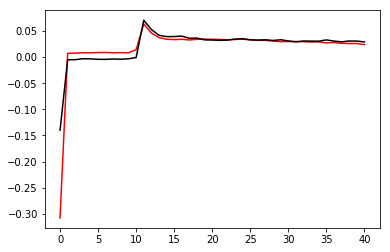

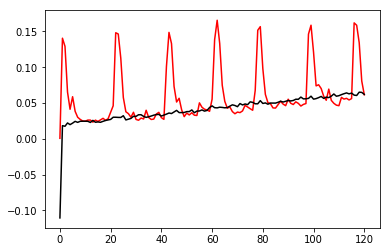

In [1472]:
dfclumps=df[df["condition"]=="Clumps"]
dfctrl=df[df["condition"]=="Ctrl"]

plt.figure()
plt.plot(np.mean(dfclumps[dfclumps["spontaneous or stimulation"]=="stim"]["calcium [f(t)-f(0)]/f(0) in rois"].values,axis=0),color='red')
plt.plot(np.mean(dfctrl[dfctrl["spontaneous or stimulation"]=="stim"]["calcium [f(t)-f(0)]/f(0) in rois"].values,axis=0),color='black')

plt.figure()
plt.plot(np.mean(dfclumps[dfclumps["spontaneous or stimulation"]=="spontaneous"]["calcium [f(t)-f(0)]/f(0) in rois"].values,axis=0),color='red')
plt.plot(np.mean(dfctrl[dfctrl["spontaneous or stimulation"]=="spontaneous"]["calcium [f(t)-f(0)]/f(0) in rois"].values,axis=0),color='black')




In [1482]:
dfclumps

,calcium recording filename,corresponding syt/clumps filename,clumpschannelno,synapsechannelno,spontaneous or stimulation,magnification,Manual mask from matlab GUI,calcium mean intensity whole frame,calcium mean intensity in rois,calcium mean intensity in rois - vector for each roi,calcium [f(t)-f(0)]/f(0) in rois,calcium [f(t)-f(0)]/f(0) in rois - vector for each roi,total calcium influx (AOC of [f(t)-f(0)]/f(0) in rois),calcium slope downwards,synchronicity (pearson),synchronicity (no. of peaks),condition
0,/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/L...,[/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/...,1,2,spontaneous,20x,"[[False, False, False, False, False, False, Fa...","[121.3855094909668, 933.0998878479004, 880.432...","[2941.473701870663, 3337.8714766033795, 3153.6...","[[0.0, 830.0737190527663, 782.0366279046748, 6...","[0.569124309971497, 0.8453004842711623, 0.7425...","[[-1.0, 0.43539867456449016, 0.352330899520860...",21.522227,NaN,0.925778,2,Clumps
1,/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/L...,no image,1,2,Ignore,20x,"[[False, False, False, False, False, False, Fa...","[62.67174530029297, 1396.8681297302246, 1396.6...","[2185.9997887651452, 2277.7471896988422, 2281....","[[0.0, 1365.7372598781822, 1365.5258472590972,...","[-0.05866667370159103, 0.01010580082362621, 0....","[[-1.0, 0.0017898449710713382, 0.0016347704767...",1.980549,NaN,0.677416,1,Clumps
2,/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/L...,[/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/...,1,2,stim,60x,"[[False, False, False, False, False, False, Fa...","[141.28565979003906, 1805.425682067871, 1803.9...","[0.0, 1698.9664063169207, 1697.672718565299, 1...","[0.0, 1698.9664063169207, 1697.672718565299, 1...","[-1.0, 0.004657411160297326, 0.003892408990412...","[-1.0, 0.004657411160297326, 0.003892408990412...",-0.296626,-0.001296,1.000000,2,Clumps
3,/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/L...,[/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/...,1,2,stim,60x,"[[False, False, False, False, False, False, Fa...","[355.48902130126953, 3930.639171600342, 3925.1...","[0.0, 3713.6315779047377, 3708.815743389409, 3...","[0.0, 3713.6315779047377, 3708.815743389409, 3...","[-1.0, 0.05552064798907731, 0.0541518496412627...","[-1.0, 0.05552064798907731, 0.0541518496412627...",0.806886,-0.001102,1.000000,1,Clumps
4,/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/L...,[/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/...,1,2,stim,60x,"[[False, False, False, False, False, False, Fa...","[296.056941986084, 4749.915718078613, 4748.142...","[0.0, 4618.416412544348, 4616.560864767374, 46...","[0.0, 4618.416412544348, 4616.560864767374, 46...","[-1.0, 0.019436944688776162, 0.019027364047380...","[-1.0, 0.019436944688776162, 0.019027364047380...",0.254144,0.000487,1.000000,1,Clumps
5,/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/L...,[/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/...,1,2,stim,60x,"[[False, False, False, False, False, False, Fa...","[387.914306640625, 6283.646514892578, 6298.044...","[6610.903783342406, 9673.16087465307, 9691.759...","[[0.0, 6107.6943677057025, 6121.815257901456, ...","[-0.5, 0.0006360633684460975, 0.00266474333063...","[[-1.0, 0.0, 0.0023119837610764073, 0.00461044...",0.697842,0.002465,0.726802,1,Clumps
6,/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/L...,[/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/...,1,2,stim,60x,"[[False, False, False, False, False, False, Fa...","[118.40682220458984, 3833.4723167419434, 3838....","[3360.856966924701, 5259.4142584951005, 5269.2...","[[0.0, 3776.8749631548735, 3782.2200856358304,...","[-0.5, 0.0015055401185702496, 0.00327622482560...","[[-1.0, 0.0, 0.0014152235732188595, 0.00226552...",1.029725,0.003928,0.711478,2,Clumps
7,/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/L...,[/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/...,1,2,stim,60x,"[[False, False, False, False, False, False, Fa...","[95.8699951171875, 2705.5671577453613, 2704.37...","[1974.017058255552, 3312.005529569904, 3309.44...","[[0.0, 2687.

In [1473]:
#clumps
dfcalc=dfclumps[dfclumps["spontaneous or stimulation"]=="spontaneous"]
print('Area under curve: '+str(dfcalc["total calcium influx (AOC of [f(t)-f(0)]/f(0) in rois)"].mean()))
print('calcium slope downwards: '+str(dfcalc["calcium slope downwards"].mean()))
print('Pearson: '+str(dfcalc["synchronicity (pearson)"].mean()))
print('No peaks: '+str(dfcalc["synchronicity (no. of peaks)"].mean()))

Area under curve: 7.146303249982722
calcium slope downwards: nan
Pearson: 0.6776132373227491
No peaks: 1.1428571428571428


In [1474]:
#clumps
dfcalc=dfclumps[dfclumps["spontaneous or stimulation"]=="stim"]
print('Area under curve: '+str(dfcalc["total calcium influx (AOC of [f(t)-f(0)]/f(0) in rois)"].mean()))
print('calcium slope downwards: '+str(dfcalc["calcium slope downwards"].mean()))
print('Pearson: '+str(dfcalc["synchronicity (pearson)"].mean()))
print('No peaks: '+str(dfcalc["synchronicity (no. of peaks)"].mean()))

Area under curve: 0.9013221298765898
calcium slope downwards: 0.0032015629139000292
Pearson: 0.6651443430848969
No peaks: 1.9655172413793103


In [1475]:
#ctrl
dfcalc=dfctrl[dfctrl["spontaneous or stimulation"]=="spontaneous"]
print('Area under curve: '+str(dfcalc["total calcium influx (AOC of [f(t)-f(0)]/f(0) in rois)"].mean()))
print('calcium slope downwards: '+str(dfcalc["calcium slope downwards"].mean()))
print('Pearson: '+str(dfcalc["synchronicity (pearson)"].mean()))
print('No peaks: '+str(dfcalc["synchronicity (no. of peaks)"].mean()))

Area under curve: 5.001558517597671
calcium slope downwards: nan
Pearson: 0.5972198108445453
No peaks: 1.25


In [1476]:
#clumps
dfcalc=dfctrl[dfctrl["spontaneous or stimulation"]=="stim"]
print('Area under curve: '+str(dfcalc["total calcium influx (AOC of [f(t)-f(0)]/f(0) in rois)"].mean()))
print('calcium slope downwards: '+str(dfcalc["calcium slope downwards"].mean()))
print('Pearson: '+str(dfcalc["synchronicity (pearson)"].mean()))
print('No peaks: '+str(dfcalc["synchronicity (no. of peaks)"].mean()))

Area under curve: 0.9324455176778714
calcium slope downwards: 0.004709302072963021
Pearson: 0.6003407587671156
No peaks: 3.6666666666666665


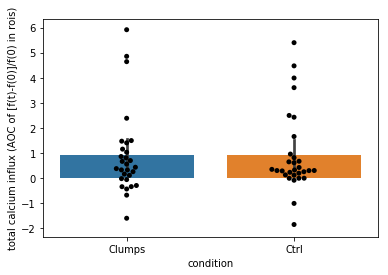

In [1481]:
df2show=df[df["spontaneous or stimulation"]=="stim"]
var="total calcium influx (AOC of [f(t)-f(0)]/f(0) in rois)"
sns.barplot(x="condition",y=var,data=df2show)
sns.swarmplot(x="condition",y=var,data=df2show,color='k')